In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.optimize as so
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

seed = 0

# Linear Model

## LAD and RSS

L1 loss function (sum of magnitudes, used for LAD model):
$$L_1(w;b) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert \text{, where } \hat{y_i} = wx + b$$


L2 loss function (RSS, residual sum of squares, used for OLS model):

$$L_2(w;b) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2  \text{, where } \hat{y_i} = wx + b$$

In [14]:
def linearModelPredict(b,X):
    yp = X @ b
    return yp

def linearModelLossLAD(b,X,y):
    y_pred = linearModelPredict(b, X)
    residual = y - y_pred
    sum_abs_dev = sum(abs(residual))
    grad = -np.dot(np.sign(residual), X)
    return (sum_abs_dev, grad)
    
def linearModelLossRSS(b,X,y):
    y_pred = linearModelPredict(b,X)
    residual = y - y_pred
    residual_sum_of_squares = sum(residual**2)
    #compute the gradient
    gradient = -2 * np.dot(np.transpose(X),residual)
    return (residual_sum_of_squares, gradient)

def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    nrows, ncols = X.shape
    b = np.zeros((ncols, 1))
    
    RESULT = so.minimize(lossfcn, b, args=(X, y),jac=True)
    estimated_betas = RESULT.x
    
    TSS = sum((y - np.mean(y))**2)
    RSS, deriv = linearModelLossRSS(estimated_betas, X, y)

    R2 = 1-(RSS / TSS)
    return (estimated_betas, R2)

/var/folders/fy/p355vwwd683668y784t68b2c0000gn/T/ipykernel_88359/4035364564.py:24: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RESULT = so.minimize(lossfcn, b, args=(X, y),jac=True)


[]

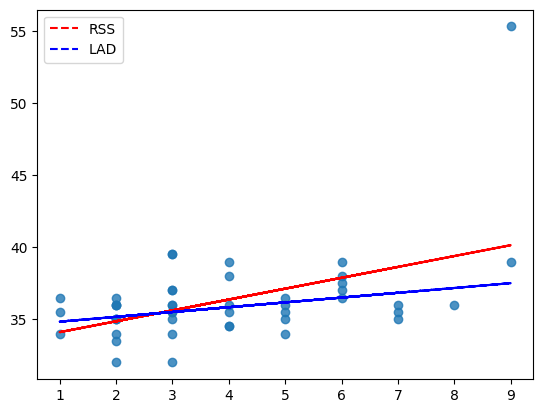

In [15]:
possum_data = pd.read_csv("./possum.csv")
x = possum_data['age']

X = np.c_[np.ones(len(possum_data)), x.to_numpy()]
y = possum_data["tailL"].to_numpy()

betas_RSS, r2_rss = linearModelFit(X,y)
betas_LAD, r2_LAD = linearModelFit(X,y, linearModelLossLAD)

y_pred_RSS = linearModelPredict(betas_RSS, X)
y_pred_LAD = linearModelPredict(betas_LAD, X)
plt.plot(X[:,1], y_pred_RSS, color='red', linestyle='--')
plt.plot(X[:,1], y_pred_LAD, color='blue', linestyle='--')
plt.scatter(x, y, alpha= 0.8)
plt.legend(['RSS', 'LAD'])
plt.plot()

## Regularization

## L1 Regularizationv (Lasso Regression)

$$
L(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2 + \lambda * \|w\|_1
$$

## L2 Regularization (Ridge Regression)

$$
L(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2 + \lambda * \|w\|^2_2
$$

## Skearn Linear Regression

In [16]:
data = pd.read_csv("Real_estate_valuation_dataset.csv")
longitude = data['longitude']
latitude = data['latitude']

x = np.c_[np.ones(len(data)), data[['longitude', 'latitude']].to_numpy()]
y = data['house_price_of_unit_area'].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=seed)

In [17]:
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
r2_test = r2_score(ytest, ypred)
print("Coefficient of determination on the test set: %.3f" % r2_test)

# Obtain intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

Coefficient of determination on the test set: 0.445
Intercept is: -49748.608
Coefficient are: [  0.    323.251 420.557]


## MultiVariable

In [18]:
x = data.drop('house_price_of_unit_area', axis=1)
x = np.c_[np.ones(len(data)), x.to_numpy()]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

Text(0.5, 0, 'Coefficient')

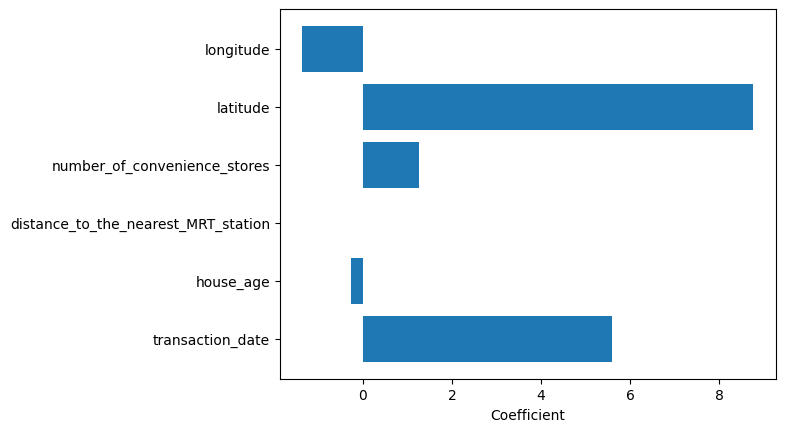

In [19]:
# Define the model
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

# Fit the model using the training set
ridge_reg.fit(x, y)

# Obtain intercept and coefficient
intercept = ridge_reg.intercept_
coefficient = ridge_reg.coef_

coefficient_feature = coefficient[1:]
features_name = data.columns[:-1]
plt.barh(features_name, coefficient_feature)
plt.xlabel('Coefficient')